# Data Description <br>
Dataset Tesla stock merupakan menyediakan informasi mengenai harga saham Tesla setiap harinya dalam rentang tahun 2010-2020. <br><br> Dataset ini terdiri dari 2416 baris dengan 7 kolom : <br> 1. Date  : time-series yang mewakili tanggal hari transaksi yang relevan<br>2.  Open : data dalam bentuk numerik merepresentasikan harga pembukaan saham pada saat transaksi <br> 3. High yang merepresentasikan data yang diberikan dalam bentuk numerik tentang harga tertinggi pada saham yang pernah terjadi pada satu periode perdagangan. <br> 4. Low : data numerik yang menunjukkan harga terendah pada saham yang pernah terjadi pada satu periode perdagangan. <br> 5. Close : data numerik yang  merupakan variabel yang menunjukkan harga penutupan saham dalam satu hari perdagangan. <br>6. adj close yang mewakili harga penutupan yang disesuaikan dari saham pada hari perdagangan yang mempengaruhi pembayaran<br>7. Volume : jumlah saham yang diperdagangkan selama satu hari dan Volume perdagangan saham yang direpresentasikan dalam bentuk numerik mengukur seberapa aktifnya perdagangan saham pada suatu hari tertentu dan sering dianggap sebagai salah satu indikator kekuatan atau kelemahan tren harga saham. <br><br> Dataset ini tidak memiliki missing value yang artinya tidak terdapat cell yang tidak terisi (kosong). 


# Data Collection and EDA

In [ ]:
# Import Library
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Path to the CSV file
df = pd.read_csv("https://raw.githubusercontent.com/cutnurhidayanti/INF-540-Kelompok1/main/Database/Project1-TSLA.csv", index_col=0, parse_dates=True)

In [ ]:
print(f"the rows and columns in the dataset:{df.shape}")
print(f"the column headers in the dataset: {df.columns}")

the rows and columns in the dataset:(2416, 6)
the column headers in the dataset: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
# Printing first 5 rows of the dataset
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
 df.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [ ]:
# Printing statistical information of the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [ ]:
# Checking for empty data fields in the dataset
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Checking data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2416 non-null   float64
 1   High       2416 non-null   float64
 2   Low        2416 non-null   float64
 3   Close      2416 non-null   float64
 4   Adj Close  2416 non-null   float64
 5   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.1 KB


# EDA

Text(0.5, 1.0, 'The General Trend of all values')

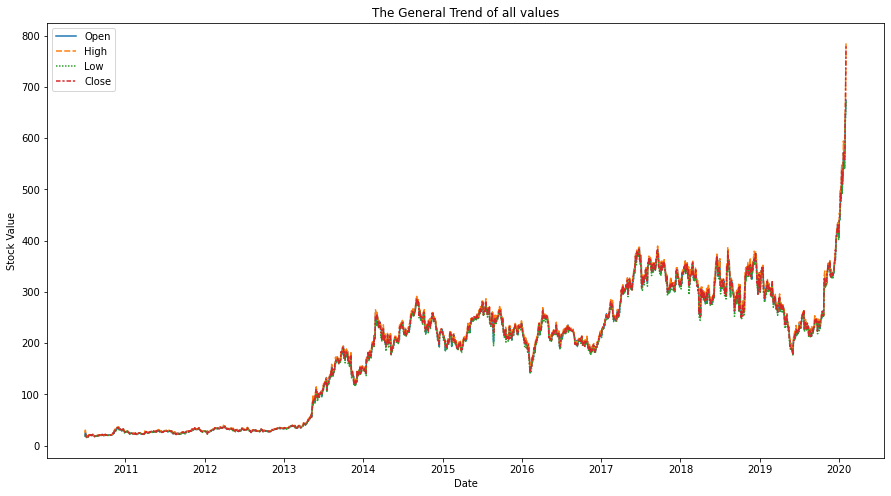

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df.iloc[:,:-2])
plt.ylabel("Stock Value")
plt.title("The General Trend of all values")

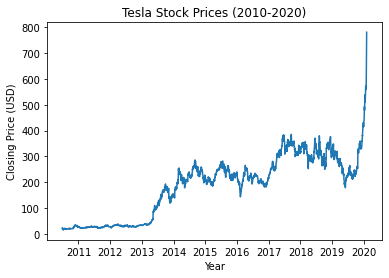

In [ ]:
# Membuat plot harga penutupan saham Tesla
plt.plot(df['Close'])
plt.title('Tesla Stock Prices (2010-2020)')
plt.xlabel('Year')
plt.ylabel('Closing Price (USD)')
plt.show()

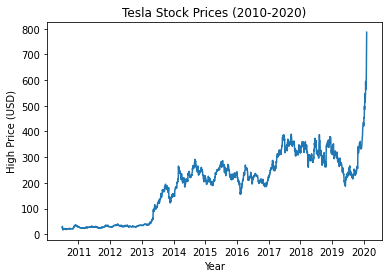

In [ ]:
# Membuat plot harga penutupan saham Tesla
plt.plot(df['High'])
plt.title('Tesla Stock Prices (2010-2020)')
plt.xlabel('Year')
plt.ylabel('High Price (USD)')
plt.show()

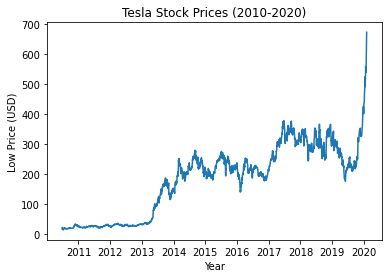

In [ ]:
# Membuat plot harga penutupan saham Tesla
plt.plot(df['Low'])
plt.title('Tesla Stock Prices (2010-2020)')
plt.xlabel('Year')
plt.ylabel('Low Price (USD)')
plt.show()

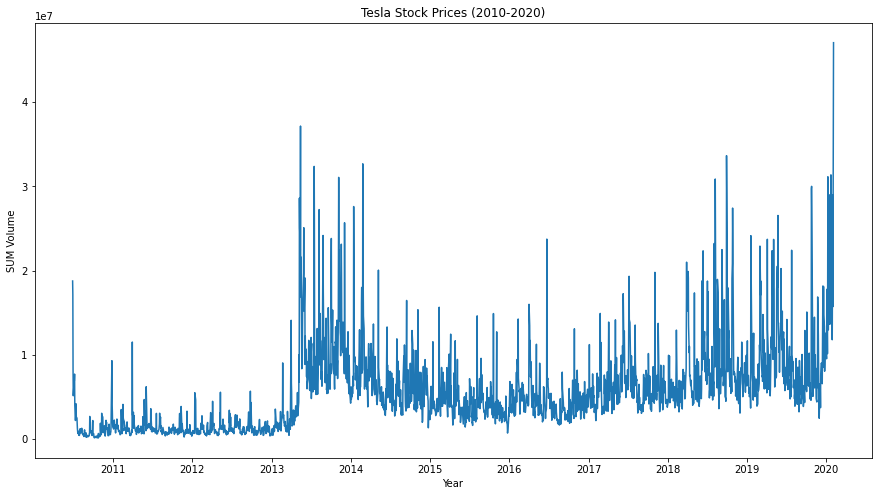

In [ ]:
# Membuat plot harga penutupan saham Tesla
plt.figure(figsize=(15,8))
plt.plot(df['Volume'])
plt.title('Tesla Stock Prices (2010-2020)')
plt.xlabel('Year')
plt.ylabel('SUM Volume')
plt.show()

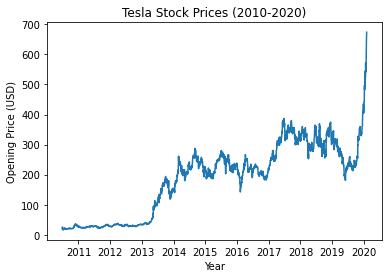

In [ ]:
# Membuat plot harga penutupan saham Tesla
plt.plot(df['Open'])
plt.title('Tesla Stock Prices (2010-2020)')
plt.xlabel('Year')
plt.ylabel('Opening Price (USD)')
plt.show()

# Fiture, Training and testing

In [ ]:
# Seperating Target variables and features
# Target Variable
y = df["Close"]

# Features
x = df.drop(["Close","Adj Close"],axis=1)

In [ ]:
# Spliting the data in 80%, 20% for training and testing
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2)

## Multiple Linear Regression

In [ ]:
# Making the model using LinearRegression()
model = LinearRegression()

# Fiting the training data in the model
model.fit(xTrain,yTrain)

LinearRegression()

In [ ]:
model.score(xTrain,yTrain)

0.9997141099558211

In [ ]:
# Getting the intercept and Coefficients
print("Intercept: ",model.intercept_)
print("Coefficients: ")
for _ in model.coef_:
    print(_)

Intercept:  -0.05888559564243678
Coefficients: 
-0.6177016961759132
0.8795221953924717
0.7375309894691848
-1.786573233797384e-08


In [ ]:
# Making predictions using the predict() and xTest data
predictions = model.predict(xTest)

In [ ]:
model.score(xTest,yTest)

0.9996874214548307

In [ ]:
# show the comparison between predicted values and actual values
comparison = pd.DataFrame({'Predicted Values':predictions,'Actual Values':yTest})

In [ ]:
print(comparison.head(15))

            Predicted Values  Actual Values
Date                                       
2010-12-21         32.422994      32.259998
2012-06-05         28.029015      27.910000
2018-09-07        260.937044     263.239990
2013-06-11         95.319105      94.470001
2018-05-22        276.989570     275.010010
2011-09-21         26.551782      25.850000
2019-05-29        189.839299     189.860001
2010-12-29         27.365325      27.730000
2013-05-06         58.436166      59.500000
2015-01-06        209.079684     211.279999
2019-09-12        249.994543     245.869995
2019-10-21        253.032059     253.500000
2013-07-08        119.924505     121.610001
2016-02-02        183.758335     182.779999
2013-04-25         52.029508      52.000000


In [ ]:
from pandas.core.indexes.datetimes import date
for x in range(16):
  sum = predictions - yTest
  sum = abs(sum)

print( 'rata : ',sum/16)


rata :  Date
2010-12-21    0.010187
2012-06-05    0.007438
2018-09-07    0.143934
2013-06-11    0.053069
2018-05-22    0.123722
                ...   
2014-07-07    0.081070
2012-06-29    0.005136
2012-03-08    0.014433
2018-11-16    0.021208
2011-08-18    0.021904
Name: Close, Length: 484, dtype: float64


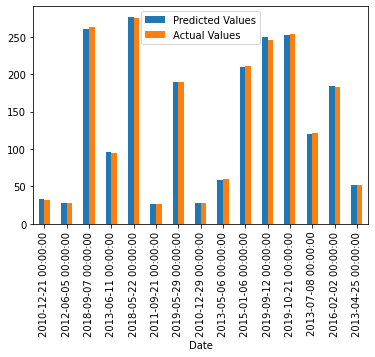

In [ ]:
graph = comparison.head(15)

graph.plot(kind = 'bar')

## Model Evaluation

In [ ]:
from sklearn import metrics
print('Mean Absolute Error : ', round(metrics.mean_absolute_error(yTest, predictions ), 2))
print('Mean Squared Error : ', round(metrics.mean_squared_error(yTest, predictions ), 2))
print('Root Mean Squared Error : ', round(math.sqrt(metrics.mean_squared_error(yTest, predictions )), 2))
print("Median absolute error =", round(metrics.median_absolute_error(yTest, predictions), 2)) 
print("Explain variance score =", round(metrics.explained_variance_score(yTest, predictions), 2)) 
print("R2 score =", round(metrics.r2_score(yTest, predictions), 2))

Mean Absolute Error :  1.41
Mean Squared Error :  4.4
Root Mean Squared Error :  2.1
Median absolute error = 0.89
Explain variance score = 1.0
R2 score = 1.0
